In [1]:
#Import all the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the given csv file using pandas
df = pd.read_csv(r"C:\Users\HP\Downloads\archive\Brain Tumor.csv")

In [3]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [4]:
df.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

So there seems to be null values in the given dataframe

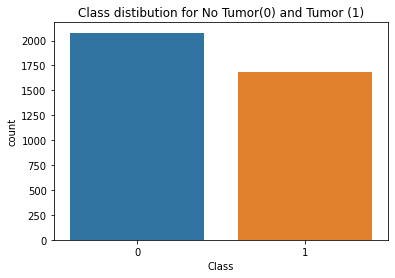

In [5]:
plot_class_distribution = sns.countplot(df.Class).set(title='Class distibution for No Tumor(0) and Tumor (1)')

The two classes distribution seems to be equal

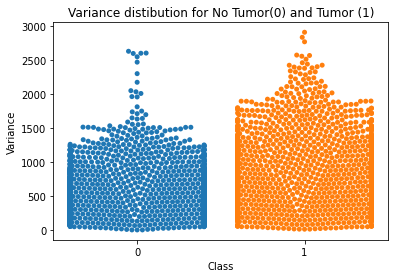

In [6]:
plot_variance_distribution = sns.swarmplot(x="Class", y="Variance", data = df).set(title='Variance distibution for No Tumor(0) and Tumor (1)')

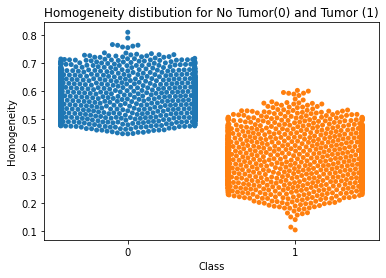

In [7]:
plot_homogenity_distribution= sns.swarmplot(x="Class", y="Homogeneity", data = df).set(title='Homogeneity distibution for No Tumor(0) and Tumor (1)')

In [8]:
class1 = df['Class']== 1
class0 = df['Class']== 0
_df = df.copy()

In [9]:
import matplotlib.pyplot as plt

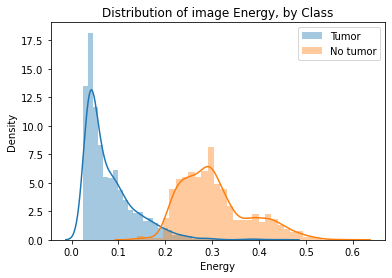

In [10]:
sns.distplot(a= _df[class1]['Energy'], label = "Tumor")
sns.distplot(a = _df[class0]['Energy'], label = "No tumor" )

plt.title("Distribution of image Energy, by Class")
plt.legend()

In [11]:
import os

import tensorflow as tf
import cv2 as cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from keras.layers import InputLayer, MaxPooling2D, Flatten, Dense, Conv2D, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL.Image import open

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [12]:
images_directory = r"..\Brain Tumor"
test_images_directory = r"..\Brain Tumor"
IMG_HEIGHT = 256
IMG_WIDTH = 256
EPOCHS = 20

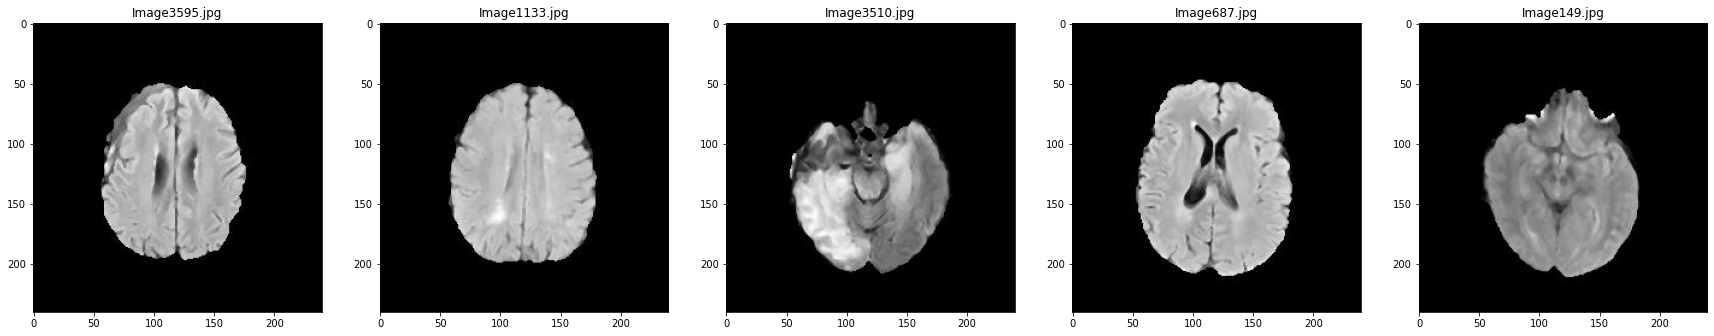

In [13]:
plt.figure(figsize=(30,30))
selected_images_directory = []
for i in range(5):
    file = random.choice(os.listdir(images_directory))
    image_path = os.path.join(images_directory, file)
    selected_images_directory.append(image_path)
    img = cv2.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

It is to noted that the image is not annotated in the image description and is not labelled in the given csv file.


In [14]:
df_new = pd.DataFrame()
df_new["Image"] = df["Image"]
df_new["Class"] = df["Class"]
path_list = []
for img_path in os.listdir(images_directory):
    path_list.append( os.path.join(images_directory,img_path))
path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
df_new["paths"] = df["Image"].map(path_dict.get)
df_new["pixels"] = df_new["paths"].map(lambda each:np.asarray(open(each).resize((IMG_HEIGHT,IMG_WIDTH))))

In [15]:
df_new.shape

(3762, 4)

In [16]:
df_new.head()

,Image,Class,paths,pixels
0,Image1,0,C:\Users\HP\Downloads\archive\Brain Tumor\Brai...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,C:\Users\HP\Downloads\archive\Brain Tumor\Brai...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,C:\Users\HP\Downloads\archive\Brain Tumor\Brai...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,C:\Users\HP\Downloads\archive\Brain Tumor\Brai...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,C:\Users\HP\Downloads\archive\Brain Tumor\Brai...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [17]:
image_list = []
for i in range(len(df_new)):
    brain_image = df_new["pixels"][i].astype(np.float32)
    brain_image /= 255
    image_list.append(brain_image)
X = np.array(image_list)
print(X.shape)

(3762, 256, 256, 3)


In [18]:
len(images_directory)

53

In [19]:
y = np.array(df_new.Class)
y.shape

(3762,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 256, 256, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 256, 256, 3)
The size of the X_test: 753


In [21]:
img_size = 256
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

In [22]:
#Own model
model_1=Sequential()
model_1.add(Conv2D(32,(3,3),input_shape=(img_size,img_size,3),activation='relu',strides=2))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(64,(3,3),activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(128,(3,3),activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.1))

model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(1, activation='sigmoid'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [24]:
optimizer = Adam(learning_rate=0.001)
loss_fn = BinaryCrossentropy(from_logits=True)
model_1.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [25]:
history_1 = model_1.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=64)

Epoch 1/20
48/48 [==============================] - 48s 812ms/step - loss: 0.8998 - accuracy: 0.8076
Epoch 2/20
48/48 [==============================] - 34s 705ms/step - loss: 0.3300 - accuracy: 0.8564
Epoch 3/20
48/48 [==============================] - 35s 715ms/step - loss: 0.3270 - accuracy: 0.8514
Epoch 4/20
48/48 [==============================] - 35s 722ms/step - loss: 0.3080 - accuracy: 0.8631
Epoch 5/20
48/48 [==============================] - 34s 701ms/step - loss: 0.3088 - accuracy: 0.8707
Epoch 6/20
48/48 [==============================] - 33s 691ms/step - loss: 0.2278 - accuracy: 0.9059
Epoch 7/20
48/48 [==============================] - 33s 679ms/step - loss: 0.3482 - accuracy: 0.8548
Epoch 8/20
48/48 [==============================] - 36s 747ms/step - loss: 0.3006 - accuracy: 0.8724
Epoch 9/20
48/48 [==============================] - 45s 932ms/step - loss: 0.3193 - accuracy: 0.8833
Epoch 10/20
48/48 [==============================] - 38s 782ms/step - loss: 0.2161 - accura

In [26]:
model_1.save(r"C:\Users\HP\Downloads\archive\BrainTumorMyownv7")

INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\archive\BrainTumorMyownv7\assets


In [27]:
train_loss_1 = history_1.history["loss"]
train_acc_1 = history_1.history["accuracy"]

In [28]:
eval_score_1= model_1.evaluate(X_test, y_test)
test_loss_1 = eval_score_1[0]
print('Eval loss:',test_loss_1)
test_acc_1 = eval_score_1[1]
print('Eval accuracy:',test_acc_1)

24/24 [==============================] - 14s 386ms/step - loss: 0.3423 - accuracy: 0.9044


In [29]:
print('At the end of training, the training accuracy is {percent:.2%}'.format(percent= train_acc_1[-1]))
print('At the end of testing, the test accuracy is {percent:.2%}'.format(percent= test_acc_1))

At the end of training, the training accuracy is 96.58%
At the end of testing, the test accuracy is 90.44%


In [31]:
y_pred = (model_1.predict(X_test) > 0.5).astype("int32")

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)



{'No Tumor': {'precision': 0.9651474530831099,
  'recall': 0.8591885441527446,
  'f1-score': 0.9090909090909091,
  'support': 419},
 'Tumor': {'precision': 0.8447368421052631,
  'recall': 0.9610778443113772,
  'f1-score': 0.8991596638655461,
  'support': 334},
 'accuracy': 0.9043824701195219,
 'macro avg': {'precision': 0.9049421475941866,
  'recall': 0.910133194232061,
  'f1-score': 0.9041252864782277,
  'support': 753},
 'weighted avg': {'precision': 0.9117382312151142,
  'recall': 0.9043824701195219,
  'f1-score': 0.9046858149272021,
  'support': 753}}

In [34]:
confusion_matrix(y_test , y_pred)

array([[360,  59],
       [ 13, 321]], dtype=int64)

In [35]:
#try with second model design

In [38]:
def model(input_shape):
    res_conv = ResNet50(include_top=False, weights="imagenet", input_tensor=None, input_shape=input_shape, pooling=None)
    model = Sequential()
    
    model.add(Input(shape=input_shape))
    
    model.add(Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
            
    model.add(Conv2D(32, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(32, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    
    model.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    
    model.add(Conv2D(128, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(128, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    
    model.add(Conv2D(256, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(256, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.15))
    model.add(Dense(1, activation="sigmoid"))    # Never use sigmoid for binary classification
    
    return model

In [39]:
model_2 = model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3))

In [40]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 32)         

In [41]:
optimizer = Adam(learning_rate=0.001)
loss_fn = BinaryCrossentropy(from_logits=True)
model_2.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [42]:
EPOCHS = 50
history_2 = model_2.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=64)

Epoch 1/50
48/48 [==============================] - 21s 349ms/step - loss: 0.5634 - accuracy: 0.6959
Epoch 2/50
48/48 [==============================] - 11s 233ms/step - loss: 0.4414 - accuracy: 0.8106
Epoch 3/50
48/48 [==============================] - 12s 247ms/step - loss: 0.3758 - accuracy: 0.8345
Epoch 4/50
48/48 [==============================] - 12s 245ms/step - loss: 0.3313 - accuracy: 0.8588
Epoch 5/50
48/48 [==============================] - 11s 237ms/step - loss: 0.2859 - accuracy: 0.8873
Epoch 6/50
48/48 [==============================] - 11s 220ms/step - loss: 0.2940 - accuracy: 0.8777
Epoch 7/50
48/48 [==============================] - 11s 237ms/step - loss: 0.2222 - accuracy: 0.9089
Epoch 8/50
48/48 [==============================] - 11s 232ms/step - loss: 0.2161 - accuracy: 0.9129
Epoch 9/50
48/48 [==============================] - 10s 207ms/step - loss: 0.2287 - accuracy: 0.9026
Epoch 10/50
48/48 [==============================] - 11s 226ms/step - loss: 0.2044 - accura

In [43]:
model_2.save(r"C:\Users\HP\Downloads\archive\BrainTumorv7")

INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\archive\BrainTumorv7\assets


In [44]:
train_loss_2 = history_2.history["loss"]
train_acc_2 = history_2.history["accuracy"]

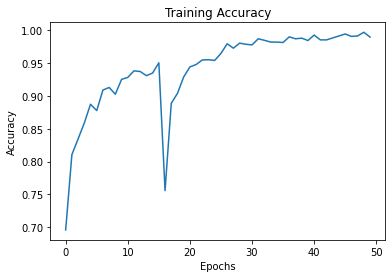

In [45]:
epoch = np.arange(EPOCHS)
plt.plot(epoch, train_acc_2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy');

In [46]:
eval_score_2 = model_2.evaluate(X_test, y_test)
test_loss_2 = eval_score_2[0]
test_acc_2 = eval_score_2[1]
print('Eval loss:',test_loss_2)
print('Eval accuracy:',test_acc_2)

24/24 [==============================] - 4s 111ms/step - loss: 0.1807 - accuracy: 0.9389


In [47]:
print('At the end of training, the training accuracy is {percent:.2%}'.format(percent= train_acc_2[-1]))
print('At the end of testing, the test accuracy is {percent:.2%}'.format(percent= test_acc_2))

At the end of training, the training accuracy is 98.97%
At the end of testing, the test accuracy is 93.89%


In [48]:
y_pred_2 = (model_1.predict(X_test) > 0.5).astype("int32")

In [50]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred_2 , output_dict = True
                      , target_names=target_classes)


{'No Tumor': {'precision': 0.9651474530831099,
  'recall': 0.8591885441527446,
  'f1-score': 0.9090909090909091,
  'support': 419},
 'Tumor': {'precision': 0.8447368421052631,
  'recall': 0.9610778443113772,
  'f1-score': 0.8991596638655461,
  'support': 334},
 'accuracy': 0.9043824701195219,
 'macro avg': {'precision': 0.9049421475941866,
  'recall': 0.910133194232061,
  'f1-score': 0.9041252864782277,
  'support': 753},
 'weighted avg': {'precision': 0.9117382312151142,
  'recall': 0.9043824701195219,
  'f1-score': 0.9046858149272021,
  'support': 753}}

In [51]:
confusion_matrix(y_test , y_pred_2)

array([[360,  59],
       [ 13, 321]], dtype=int64)

There are 72 images out of 753 missclassified for the model 2